# Short Course: Machine Learning for Exploration Geophysics

Hamburg, 10. - 12. March 2020

#### Computer Class 1.1: Introduction to Regression

Table of Content:
- [Packages](#Packages)
- [Import the dataset](#Import-the-dataset)
- [Data preprocessing](#Data-preprocessing)
- [Train/Test Split](#Train-Test-Split)
- [Fitting Linear Regression](#Fitting-Linear-Regression)
- [Predict using Linear Regression](#Predict-using-Linear-Regression)
- [Visualize the results](#Visualize-the-results)

## Packages

Let's first import all the packages: 
- [numpy](https://www.numpy.org/) is the fundamental package for scientific computing with Python.
- [pandas](https://pandas.pydata.org/) is a software library for data manipulation and analysis.
- [matplotlib](https://matplotlib.org/) is a comprehensive library for creating static, animated, and interactive visualizations in Python.
- [seaborn](https://seaborn.pydata.org/) is a statistical data visualization library based on matplotlib.
- [scikit-learn](https://scikit-learn.org/stable/) is a simple and efficient tools for predictive data analysis.

In [1]:
#!pip install pandas
#!pip install -U scikit-learn

#!python -m pip install -U pip
#!python -m pip install -U matplotlib

#!pip install pandas

#!pip install seaborn

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

print('Pandas:  ' + pd.__version__)
print('Numpy:   ' + np.__version__)
print('Sklearn: ' + sklearn.__version__)

Pandas:  0.24.2
Numpy:   1.17.4
Sklearn: 0.22.2.post1


## Import the dataset

A comma-separated values (CSV) file is a type of plain text file that is widely supported by machine learning applications. We can read a CSV file using pandas [read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) function into [DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html).

In [1]:
df = pd.read_csv('data/berlin_flat_price.csv')
#df = pd.read_excel('data/berlin_flat_price.xlsx')

NameError: name 'pd' is not defined

Let us first visualize a few examples to see what columns there are, what information they contain, how the values are coded. We could use the following methods: 

- [head(self, n)](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html#pandas.DataFrame.head) - Return the first n rows,
- [info](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html#pandas.DataFrame.info) - Print a concise summary of a DataFrame,
- [describe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html#pandas.DataFrame.describe) - Generate descriptive statistics.

In [4]:
#df.head(10) #View first 10 data rows
#df.info()
#df.describe()

#### Various pandas data types

Pandas dtype |Python type |NumPy type |Usage
:---: | :---: | :---: | :---:  
object |str | string_, unicode_ |Text
int64  |int | int_, int8, int16, int32, int64, uint8, uint16, uint32, uint64 | Integer numbers
float64 |float | float_, float16, float32, float64 | Floating point numbers
bool | bool | bool_ |True/False values
datetime64 | NA | datetime64 |Date and time values
timedelta | NA | NA | Differences between two datetimes
category | NA | NA | Finite list of text values

In [5]:
df['Price'] = df['Price']/1000;  # in 1000s euro

## Plot pairwise relationships in the dataset

Let us plot pairwise relationships in a dataset. [seaborn.pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot) function creates a grid of Axes such that each numeric variable in data will by shared in the y-axis across a single row and in the x-axis across a single column. The diagonal Axes are treated differently, drawing a plot to show the univariate distribution of the data for the variable in that column.

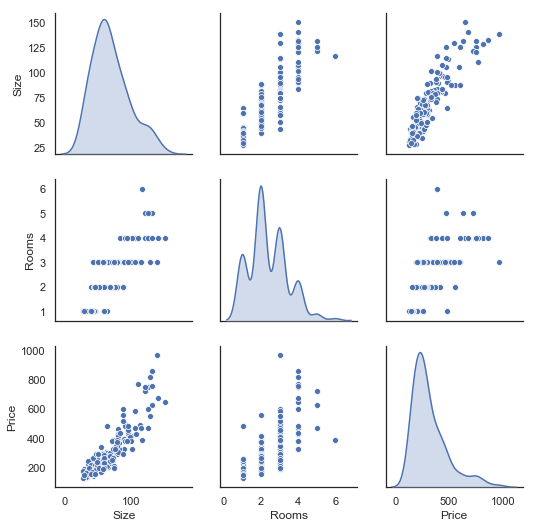

In [6]:
sns.set()
sns.set_style("white")
sns.pairplot(df, diag_kind="kde")

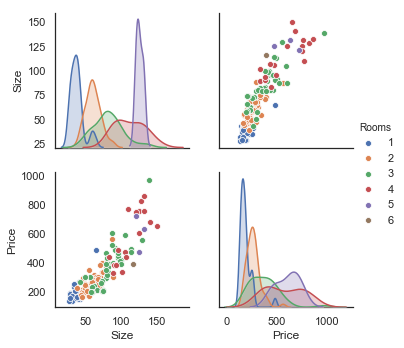

In [7]:
sns.pairplot(df, hue='Rooms', vars=["Size", "Price"])

## Data preprocessing 

The [sklearn.preprocessing](https://scikit-learn.org/stable/modules/preprocessing.html) package provides several common utility functions and transformer classes to change raw feature vectors into a representation that is more suitable for the downstream estimators. In general, learning algorithms benefit from standardization of the data set. If some outliers are present in the set, robust scalers or transformers are more appropriate. In this example, will use Standard Scaler.

In [8]:
X = df[['Size']].values
y = df['Price'].values    

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

#X_scaled.mean()
#X_scaled.std()

## Train-Test Split

Let us split the data into random train and test subsets. In scikit-learn a random split into training and test sets can be quickly computed with the [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)  helper function.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, shuffle=False)

In [10]:
print('Size of the initial X dataset: ' + str(X.shape))
print('Size of the initial y dataset: ' + str(y.shape))
print('Size of the X_train dataset: ' + str(X_train.shape))
print('Size of the y_train dataset: ' + str(y_train.shape))
print('Size of the X_test dataset: ' + str(X_test.shape))
print('Size of the y_test dataset: ' + str(y_test.shape))

Size of the initial X dataset: (155, 1)
Size of the initial y dataset: (155,)
Size of the X_train dataset: (124, 1)
Size of the y_train dataset: (124,)
Size of the X_test dataset: (31, 1)
Size of the y_test dataset: (31,)


# Fitting Linear Regression

In [11]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
reg.score(X_train,y_train)

0.8257816688788631

In [13]:
w = reg.coef_
b = reg.intercept_

In [14]:
print('Parameter b: ' + str(b))
print('Parameter w: ' + str(w))

Parameter b: -54.5158939192508
Parameter w: [5.57343474]


## Predict using Linear Regression

In [15]:
y_pred = reg.predict(X_test)

### Evaluation Metric

`Mean Squared Error` and `Root Mean Squared Error` are the common evaluation metrics to assesses the quality of a predictor.

Mean squared error is the mean value of the squared deviations of the predictions from the true values:

$$\operatorname{MSE}=\frac{1}{n}\sum_{i=1}^n\big(y^{(i)}-y_m^{(i)}\big)^2$$

where:
- $y_m^{(i)}$ is the predicted value
- $y^{(i)}$ is the true value.

The root-mean-square error (RMSE) is defined as the square root of the mean square error:

$$\operatorname{RMSE}=\sqrt{\operatorname{MSE}}.$$

### Score (coefficient $R^2$)

$$R =  1 - \frac{\sum_{i=1}^N \big( y^{(i)} - y_m^{(i)} \big)^2}{\sum_{i=1}^N \big( y^{(i)} - \bar{y} \big)^2}   $$, 

where:
- $y_m^{(i)}$ is the predicted value
- $y^{(i)}$ is the true value
- $\bar{y}$ is the mean value of $y^{(i)}$

Note: 
- The best possible score is 1.0. 
- Score can be negative. 
- A constant model that always predicts the expected value of y, disregarding the input features, would get a $R^2$ score of 0.0.






In [16]:
MSE = mean_squared_error(y_test, y_pred, squared=True)
RMSE = mean_squared_error(y_test, y_pred, squared=False)

print('MSE = ' + str(MSE))
print('RMSE = '+ str(RMSE))

MSE = 9319.017049646307
RMSE = 96.53505606589923


## Visualize the results

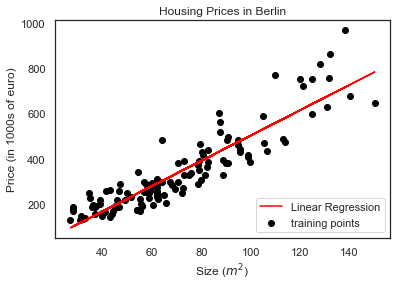

In [17]:
plt.scatter(X_train, y_train, color='black', marker='o', label="training points")
plt.plot(X_train, reg.predict(X_train), color='red', label="Linear Regression")
plt.xlabel('Size ($m^2$)')
plt.ylabel('Price (in 1000s of euro)')
plt.title('Housing Prices in Berlin')
plt.legend(loc='lower right')
plt.show()